In [52]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

import os, sys
import re

In [49]:
project_path = "HMAD/projects/AA0075/OPENFACE"
ofo_path = os.path.join(project_path, "processed", "AA0075_ofo.csv")
nods_path = "UEDialogue2020-SR/AnnotationsNods/AA0075_FML_MP_simplified_nod.txt"
pyr_path = os.path.join(project_path, "tables", "itdcomplete.txt")
au_path = os.path.join(project_path, "tables", "audf.txt")

In [22]:
ofo = pd.read_csv(ofo_path, sep=", ")
print(ofo.shape)
ofo.head()

(4968, 714)


frame  face_id  timestamp  confidence  success  gaze_0_x  gaze_0_y  \
0      1        0       0.00        0.98        1 -0.008854  0.270906   
1      2        0       0.04        0.98        1  0.014620  0.266655   
2      3        0       0.08        0.98        1  0.020237  0.258625   
3      4        0       0.12        0.98        1  0.020353  0.259581   
4      5        0       0.16        0.98        1  0.010886  0.252589   

   gaze_0_z  gaze_1_x  gaze_1_y  ...  AU12_c  AU14_c  AU15_c  AU17_c  AU20_c  \
0 -0.962565 -0.111427  0.234247  ...     0.0     1.0     0.0     0.0     0.0   
1 -0.963681 -0.116263  0.223359  ...     0.0     0.0     0.0     0.0     0.0   
2 -0.965766 -0.111630  0.220873  ...     0.0     1.0     0.0     1.0     0.0   
3 -0.965507 -0.113355  0.213700  ...     0.0     1.0     0.0     0.0     0.0   
4 -0.967512 -0.094725  0.212375  ...     0.0     1.0     0.0     0.0     0.0   

   AU23_c  AU25_c  AU26_c  AU28_c  AU45_c  
0     0.0     0.0     1.0     0.0     1.0  
1     0.0     0.0     1.0     0.0     1.0  
2     0.0     0.0     1.0     0.0     1.0  
3     0.0     0.0     1.0     0.0     1.0  
4     0.0     0.0     1.0     0.0     1.0  

[5 rows x 714 columns]

In [23]:
print(ofo.columns.tolist())

['frame', 'face_id', 'timestamp', 'confidence', 'success', 'gaze_0_x', 'gaze_0_y', 'gaze_0_z', 'gaze_1_x', 'gaze_1_y', 'gaze_1_z', 'gaze_angle_x', 'gaze_angle_y', 'eye_lmk_x_0', 'eye_lmk_x_1', 'eye_lmk_x_2', 'eye_lmk_x_3', 'eye_lmk_x_4', 'eye_lmk_x_5', 'eye_lmk_x_6', 'eye_lmk_x_7', 'eye_lmk_x_8', 'eye_lmk_x_9', 'eye_lmk_x_10', 'eye_lmk_x_11', 'eye_lmk_x_12', 'eye_lmk_x_13', 'eye_lmk_x_14', 'eye_lmk_x_15', 'eye_lmk_x_16', 'eye_lmk_x_17', 'eye_lmk_x_18', 'eye_lmk_x_19', 'eye_lmk_x_20', 'eye_lmk_x_21', 'eye_lmk_x_22', 'eye_lmk_x_23', 'eye_lmk_x_24', 'eye_lmk_x_25', 'eye_lmk_x_26', 'eye_lmk_x_27', 'eye_lmk_x_28', 'eye_lmk_x_29', 'eye_lmk_x_30', 'eye_lmk_x_31', 'eye_lmk_x_32', 'eye_lmk_x_33', 'eye_lmk_x_34', 'eye_lmk_x_35', 'eye_lmk_x_36', 'eye_lmk_x_37', 'eye_lmk_x_38', 'eye_lmk_x_39', 'eye_lmk_x_40', 'eye_lmk_x_41', 'eye_lmk_x_42', 'eye_lmk_x_43', 'eye_lmk_x_44', 'eye_lmk_x_45', 'eye_lmk_x_46', 'eye_lmk_x_47', 'eye_lmk_x_48', 'eye_lmk_x_49', 'eye_lmk_x_50', 'eye_lmk_x_51', 'eye_lmk_x_52',

Dans R, `pitch,yaw,roll` sont ajoutés.
Ce qui nous intéresse: `pitch`
<br>ça se trouve dans un autre fichier: `itdcomplete.txt`

In [5]:
nods = pd.read_csv(nods_path, sep='\t')
nods["duration"] = nods.tmax - nods.tmin
print(nods.shape)
nods.head()

(44, 5)


tmin    tmax     annot value  duration
0   3.610   4.750  Complexe   Nod      1.14
1   7.780   8.640       Nod   Nod      0.86
2   9.280  10.080  Complexe   Nod      0.80
3  12.520  14.550       Nod   Nod      2.03
4  19.825  22.025       Nod   Nod      2.20

In [6]:
nods.annot.value_counts()

Nod                       19
Froncement de sourcils    12
Complexe                   9
Backward                   2
Haussement de sourcils     1
Tilt                       1
Name: annot, dtype: int64

In [7]:
nods.value.value_counts()

Nod       28
No_nod    16
Name: value, dtype: int64

In [16]:
#labels = nods.value.unique().tolist()
#fig, ax = plt.subplots(len(labels), 1, sharex=True)
#for i, label in enumerate(labels):
#    sns.distplot(nods[nods.value == label]['duration'], ax=ax[i], rug=True)
#plt.show()

    

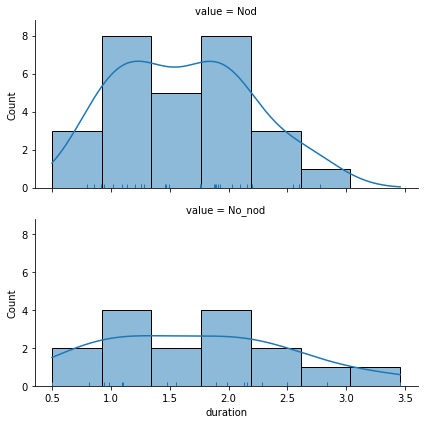

In [17]:
sns.displot(data=nods, x="duration", row="value", kde=True, rug=True, height=3, aspect = 2)

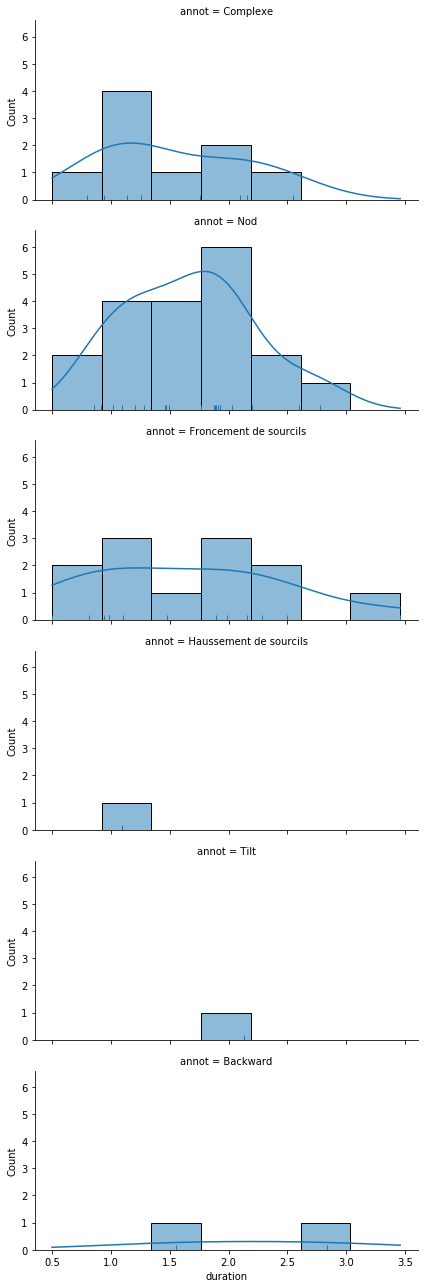

In [14]:
sns.displot(data=nods, x="duration", row="annot", kde=True, rug=True, height=3, aspect = 2)

Looking into the OpenFace data

In [18]:
ofo.describe()

frame   face_id    timestamp   confidence      success  \
count  4968.000000    4968.0  4968.000000  4968.000000  4968.000000   
mean   2484.500000       0.0    99.320008     0.979769     0.999799   
std    1434.282399       0.0    57.359746     0.013589     0.014188   
min       1.000000       0.0     0.000000     0.030000     0.000000   
25%    1242.750000       0.0    49.660000     0.980000     1.000000   
50%    2484.500000       0.0    99.320000     0.980000     1.000000   
75%    3726.250000       0.0   148.980000     0.980000     1.000000   
max    4968.000000       0.0   198.640000     0.980000     1.000000   

          gaze_0_x     gaze_0_y     gaze_0_z     gaze_1_x     gaze_1_y  ...  \
count  4968.000000  4968.000000  4968.000000  4968.000000  4968.000000  ...   
mean      0.063570     0.147331    -0.984553    -0.096087     0.153236  ...   
std       0.033498     0.056590     0.019581     0.037799     0.054080  ...   
min      -0.150380    -0.199295    -0.997510    -0.313182    -0.051991  ...   
25%       0.047229     0.112709    -0.991088    -0.121499     0.118413  ...   
50%       0.064765     0.137276    -0.988233    -0.095878     0.152482  ...   
75%       0.082212     0.165767    -0.983600    -0.069532     0.180731  ...   
max       0.315460     0.572220     0.000000     0.068232     0.576052  ...   

            AU12_c       AU14_c       AU15_c       AU17_c       AU20_c  \
count  4968.000000  4968.000000  4968.000000  4968.000000  4968.000000   
mean      0.015097     0.460548     0.118156     0.068237     0.057367   
std       0.121950     0.498491     0.322825     0.252177     0.232566   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     1.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

            AU23_c       AU25_c       AU26_c       AU28_c       AU45_c  
count  4968.000000  4968.000000  4968.000000  4968.000000  4968.000000  
mean      0.018720     0.135467     0.147142     0.001409     0.240942  
std       0.135547     0.342256     0.354283     0.037514     0.427698  
min       0.000000     0.000000     0.000000     0.000000     0.000000  
25%       0.000000     0.000000     0.000000     0.000000     0.000000  
50%       0.000000     0.000000     0.000000     0.000000     0.000000  
75%       0.000000     0.000000     0.000000     0.000000     0.000000  
max       1.000000     1.000000     1.000000     1.000000     1.000000  

[8 rows x 714 columns]

* Timestamp: séparation toutes les 0.04s ==> plusieurs timestamps pour 1 nod/no_nod (TS)
* Toutes les AU sont binaires (oui/non)

https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format

Proposition: on peut observer les TS pour nod / no_nod => time warping?

Commencer par aligner les deux dataframes
<br>Remarque: "trous" dans la vidéo.

Méthode 1: créer l'index, pivoter, etc
<br>Méthode 2: apply

In [20]:
def create_timestamps(tmin, tmax, sampling=0.04, inclusive=False):
    """ Transform (3.610, 4.750) into [3.64, 3.68, 3.72...]
    """
    uptmin = (np.ceil(tmin/sampling) if not inclusive else np.floor(tmin/sampling)) * sampling
    uptmax = (np.ceil(tmax/sampling) if inclusive else np.floor(tmax/sampling)) * sampling
    return np.arange(uptmin, uptmax, sampling)

In [34]:
pat = re.compile('AU[0-9]{2}_r')
data = ofo[[col for col in ofo.columns if col in ['frame', 'timestamp'] or re.search(pat, col) is not None]]
data.shape

(4968, 19)

In [45]:
data["value"] = None
data["annot"] = None
for i, x in nods.iterrows():
    print(x.tmin, x.tmax, x.value)
    data["value"] = x.value # .where(data["timestamp"].between(x.tmin, x.tmax))
    data.where(data["timestamp"].between(x.tmin, x.tmax))["annot"] = x.annot
    if i % 5 == 0:
        print(data[data["timestamp"].between(x.tmin, x.tmax)])

75    0.00     0.0    0.00   
3353   3354    134.093    0.38    0.07    1.84    0.00     0.0    0.04   
3354   3355    134.133    0.57    0.23    1.89    0.00     0.0    0.11   
3355   3356    134.173    0.81    0.34    2.02    0.00     0.0    0.28   
3356   3357    134.213    0.84    0.46    2.00    0.00     0.0    0.33   
3357   3358    134.253    0.70    0.39    2.06    0.00     0.0    0.25   
3358   3359    134.293    0.52    0.32    1.89    0.00     0.0    0.09   
3359   3360    134.333    0.52    0.35    1.82    0.00     0.0    0.00   
3360   3361    134.373    0.63    0.38    1.80    0.00     0.0    0.00   
3361   3362    134.413    0.74    0.31    1.84    0.00     0.0    0.00   
3362   3363    134.453    0.85    0.14    1.88    0.00     0.0    0.00   
3363   3364    134.493    0.87    0.06    1.86    0.00     0.0    0.00   
3364   3365    134.533    0.84    0.15    1.84    0.00     0.0    0.00   
3365   3366    134.573    0.83    0.16    1.92    0.04     0.0    0.00   
3366   3

In [41]:
data[data["timestamp"].between(193.985, 196.585)]

frame  timestamp  AU01_r  AU02_r  AU04_r  AU05_r  AU06_r  AU07_r  \
4851   4852    194.001    1.08    0.62    1.33     0.0     0.0     0.0   
4852   4853    194.041    1.06    0.62    1.29     0.0     0.0     0.0   
4853   4854    194.081    0.98    0.58    1.27     0.0     0.0     0.0   
4854   4855    194.121    0.87    0.43    1.22     0.0     0.0     0.0   
4855   4856    194.161    0.88    0.27    1.23     0.0     0.0     0.0   
...     ...        ...     ...     ...     ...     ...     ...     ...   
4911   4912    196.400    0.42    0.08    0.99     0.0     0.0     0.0   
4912   4913    196.440    0.48    0.15    1.05     0.0     0.0     0.0   
4913   4914    196.480    0.48    0.11    1.08     0.0     0.0     0.0   
4914   4915    196.520    0.49    0.07    1.06     0.0     0.0     0.0   
4915   4916    196.560    0.47    0.00    0.97     0.0     0.0     0.0   

      AU09_r  AU10_r  ...  AU14_r  AU15_r  AU17_r  AU20_r  AU23_r  AU25_r  \
4851    0.00     0.0  ...    0.45     0.0    0.17    0.00    0.00    0.13   
4852    0.00     0.0  ...    0.41     0.0    0.26    0.00    0.00    0.07   
4853    0.00     0.0  ...    0.38     0.0    0.25    0.00    0.00    0.01   
4854    0.00     0.0  ...    0.41     0.0    0.29    0.01    0.00    0.05   
4855    0.00     0.0  ...    0.53     0.0    0.33    0.02    0.00    0.12   
...      ...     ...  ...     ...     ...     ...     ...     ...     ...   
4911    0.13     0.0  ...    0.03     0.0    0.00    0.00    0.03    0.00   
4912    0.17     0.0  ...    0.03     0.0    0.00    0.00    0.01    0.00   
4913    0.20     0.0  ...    0.02     0.0    0.00    0.00    0.00    0.00   
4914    0.14     0.0  ...    0.00     0.0    0.00    0.08    0.00    0.03   
4915    0.15     0.0  ...    0.00     0.0    0.00    0.09    0.00    0.11   

      AU26_r  AU45_r  value annot  
4851    0.09    0.75   None  None  
4852    0.02    0.51   None  None  
4853    0.01    0.33   None  None  
4854    0.08    0.14   None  None  
4855    0.21    0.00   None  None  
...      ...     ...    ...   ...  
4911    0.00    0.85   None  None  
4912    0.00    0.83   None  None  
4913    0.00    0.69   None  None  
4914    0.00    0.54   None  None  
4915    0.00    0.37   None  None  

[65 rows x 21 columns]

In [50]:
pyr = pd.read_csv(pyr_path, sep="\t")
pyr.head()

frame  time  timem  times  confidence   pitch     yaw    roll       MOx  \
0      1  0.00      0   0.00        0.98 -6.0161  5.6150  2.2345  852.5146   
1      2  0.04      0   0.04        0.98 -6.0734  4.1826  2.7502  853.1868   
2      3  0.08      0   0.08        0.98 -5.6150  5.2139  1.0886  853.7894   
3      4  0.12      0   0.12        0.98 -5.7296  4.5264  2.0054  852.8113   
4      5  0.16      0   0.16        0.98 -5.4431  5.2139  0.8594  853.1889   

        MOy  ...   rP65y   rP66x   rP66y   rP67x   rP67y   rP68x   rP68y  \
0  555.0926  ... -0.3212 -0.2228  0.7368 -0.1370  0.7757 -0.1604  0.8427   
1  555.0756  ... -0.3221  0.4100  0.5190  0.4083  0.3917  0.5352  0.4064   
2  555.3585  ... -0.3257 -0.5958  0.5826 -0.4135  0.4554 -0.1066  0.4617   
3  555.8667  ... -0.2983 -0.2241  0.4778 -0.0338  0.4449  0.2901  0.4549   
4  556.6610  ... -0.4044 -0.7120  0.5346 -0.5328  0.5334 -0.2235  0.4676   

      eaX     eaY       gde  
0  0.9998  1.0011  1.625166  
1  0.9966  1.0024  1.614559  
2  0.9932  0.9945  1.045137  
3  0.9941  0.9978  1.272294  
4  0.9927  0.9934  1.041203  

[5 rows x 287 columns]

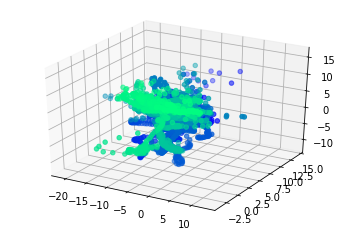

In [64]:
ax = plt.axes(projection='3d')
ax.scatter3D(pyr.pitch, pyr.yaw, pyr.roll, c=pyr.time, cmap='winter')

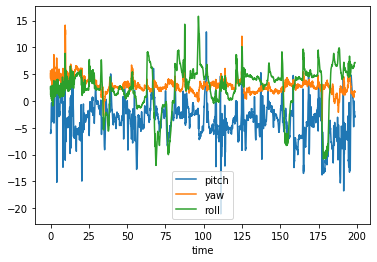

In [66]:
pyr.set_index('time')[['pitch', 'yaw', 'roll']].plot()

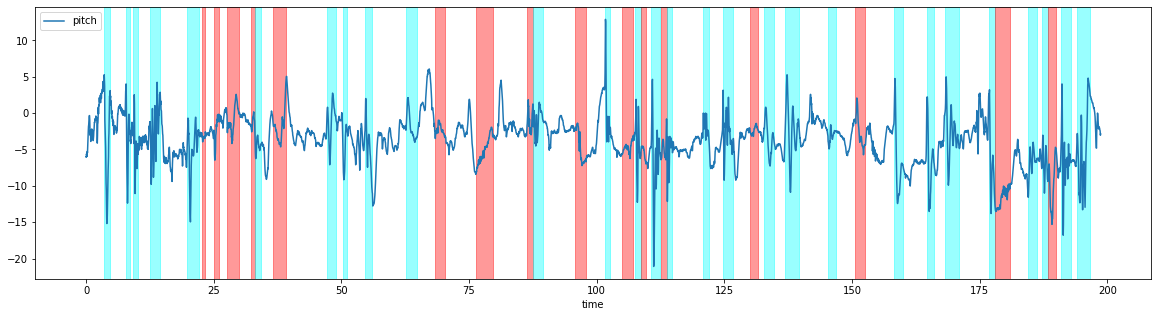

In [72]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
pyr.set_index('time')[['pitch']].plot(ax=ax)
for i, x in nods.iterrows():
    color = 'cyan' if x.value == 'Nod' else 'red'
    ax.axvspan(x.tmin, x.tmax, color = color, alpha=0.4)

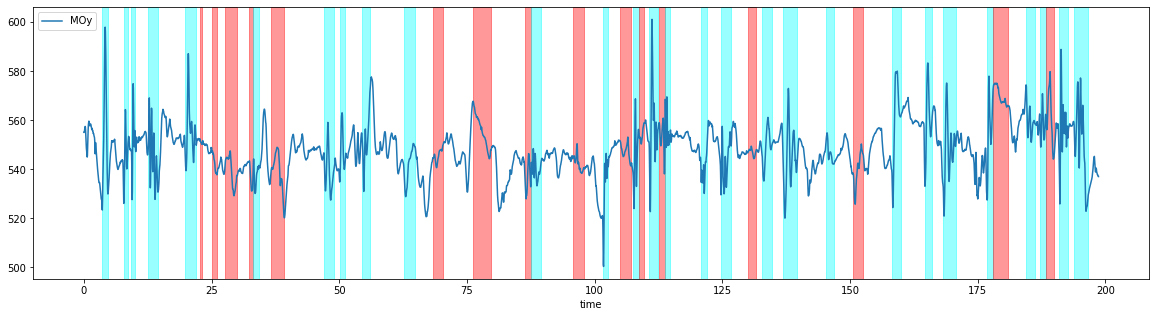

In [135]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
pyr.set_index('time')[['MOy']].plot(ax=ax)
for i, x in nods.iterrows():
    color = 'cyan' if x.value == 'Nod' else 'red'
    ax.axvspan(x.tmin, x.tmax, color = color, alpha=0.4)

In [73]:
import matplotlib
cmap = matplotlib.cm.get_cmap('Spectral')


In [74]:
cmap(0)

(0.6196078431372549, 0.00392156862745098, 0.25882352941176473, 1.0)

Pour les AU: https://en.wikipedia.org/wiki/Facial_Action_Coding_System 
<br>2 types de sourires:
* Duchenne smile
* involuntary smile 

Si on regarde par exemple la répartition des sourires par rapport aux nods:

In [87]:
au_corners = [6,12]

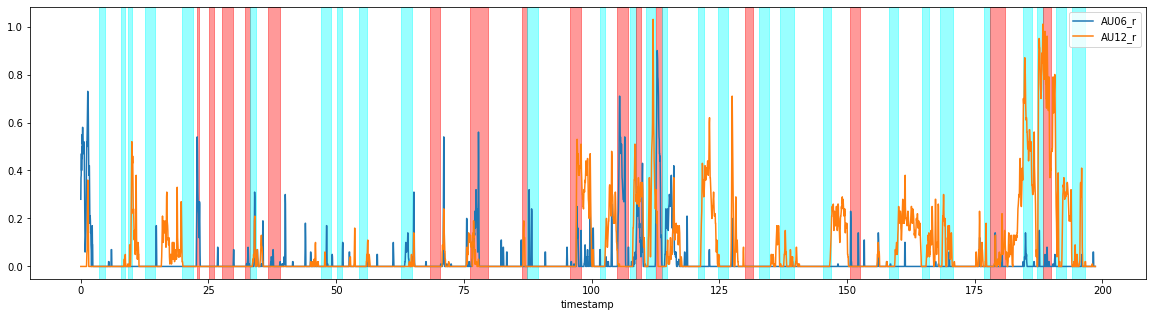

In [90]:
fig, ax = plt.subplots(1,1, figsize=(20,5))
ofo.set_index('timestamp')[[f'AU{col:02d}_r' for col in au_corners]].plot(ax=ax)
for i, x in nods.iterrows():
    color = 'cyan' if x.value == 'Nod' else 'red'
    ax.axvspan(x.tmin, x.tmax, color = color, alpha=0.4)

Eventplot des AU les uns par rapport aux autres (on peut prendre les `_c` dans un premier temps pour regarder, puis ajouter l'intensité en couleurs).

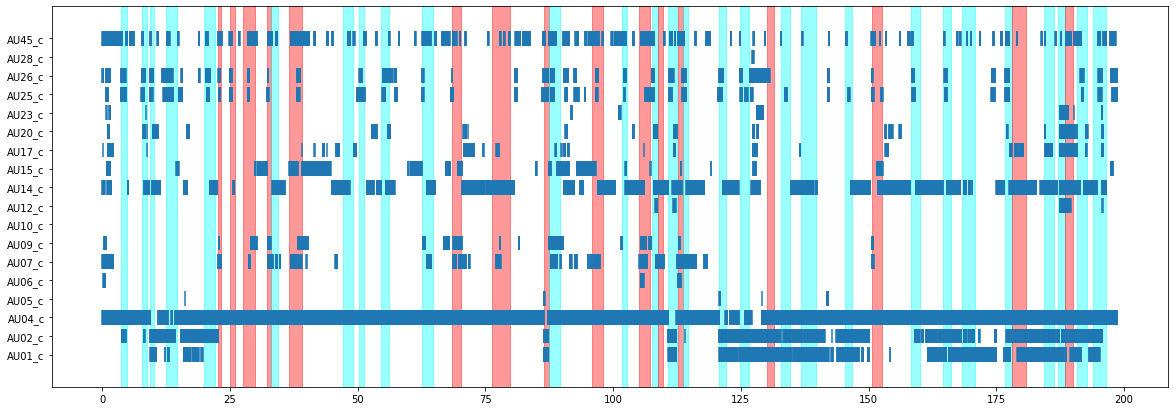

In [112]:
fig, ax = plt.subplots(1,1, figsize=(20,7))

pat = re.compile('AU[0-9]{2}_c') # c: existence
ax.eventplot([ofo[ofo[col] > 0].set_index('timestamp').index.tolist() for col in ofo.columns if re.search(pat,col) is not None],
                linelengths=0.8)
ax.set_yticks(range(0,18))
ax.set_yticklabels([col for col in ofo.columns if re.search(pat,col) is not None])

for i, x in nods.iterrows():
    color = 'cyan' if x.value == 'Nod' else 'red'
    ax.axvspan(x.tmin, x.tmax, color = color, alpha=0.4)

plt.show()

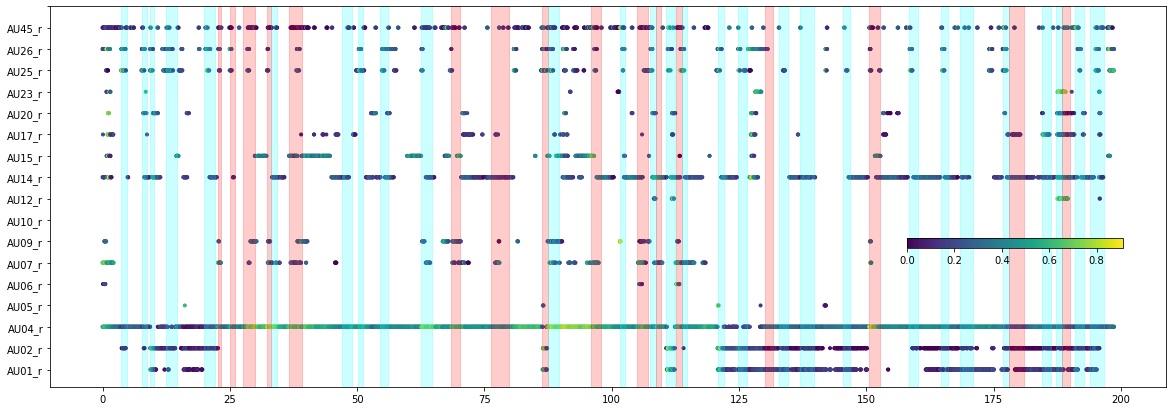

In [133]:
fig, ax = plt.subplots(1,1, figsize=(20,7))
cax = fig.add_axes([0.75’, 0.4, 0.15, 0.02])

pat = re.compile('AU[0-9]{2}_r')
i = 0
for col in ofo.columns: 
    if re.search(pat,col) is not None:
        # tous les points d'1 AU sont sur la même ligne, on a donc x = index, y = i, c = valeur
        idx = ofo[ofo[col[:-1]+'c'] > 0].index.tolist()
        im = ax.scatter( ofo['timestamp'].loc[idx].tolist(), [i]*len(idx), c=(ofo[col]/5).loc[idx].tolist(), marker='.') # /5 normalise for all columns to have the same scale
        i += 1

ax.set_yticks(range(0,18))
ax.set_yticklabels([col for col in ofo.columns if re.search(pat,col) is not None])

for i, x in nods.iterrows():
    color = 'cyan' if x.value == 'Nod' else 'red'
    ax.axvspan(x.tmin, x.tmax, color = color, alpha=0.2)

fig.colorbar(im, cax=cax, orientation='horizontal')
plt.show()